In [1]:
from sklearn.datasets import make_moons
#noise 표준편차
X, y = make_moons(n_samples=100, noise=0.25,
random_state=3)

In [2]:
from sklearn.model_selection import train_test_split
# 학습용:검증용 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y,
stratify=y, random_state=0)

In [10]:
from sklearn.tree import DecisionTreeClassifier
# 의사결정나무모형
# criterion(entropy,gini)
model = DecisionTreeClassifier(random_state=2,criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2)

In [11]:
print(" 학습용:",model.score(X_train, y_train))
print(" 검증용:",model.score(X_test, y_test))

 학습용: 1.0
 검증용: 0.92


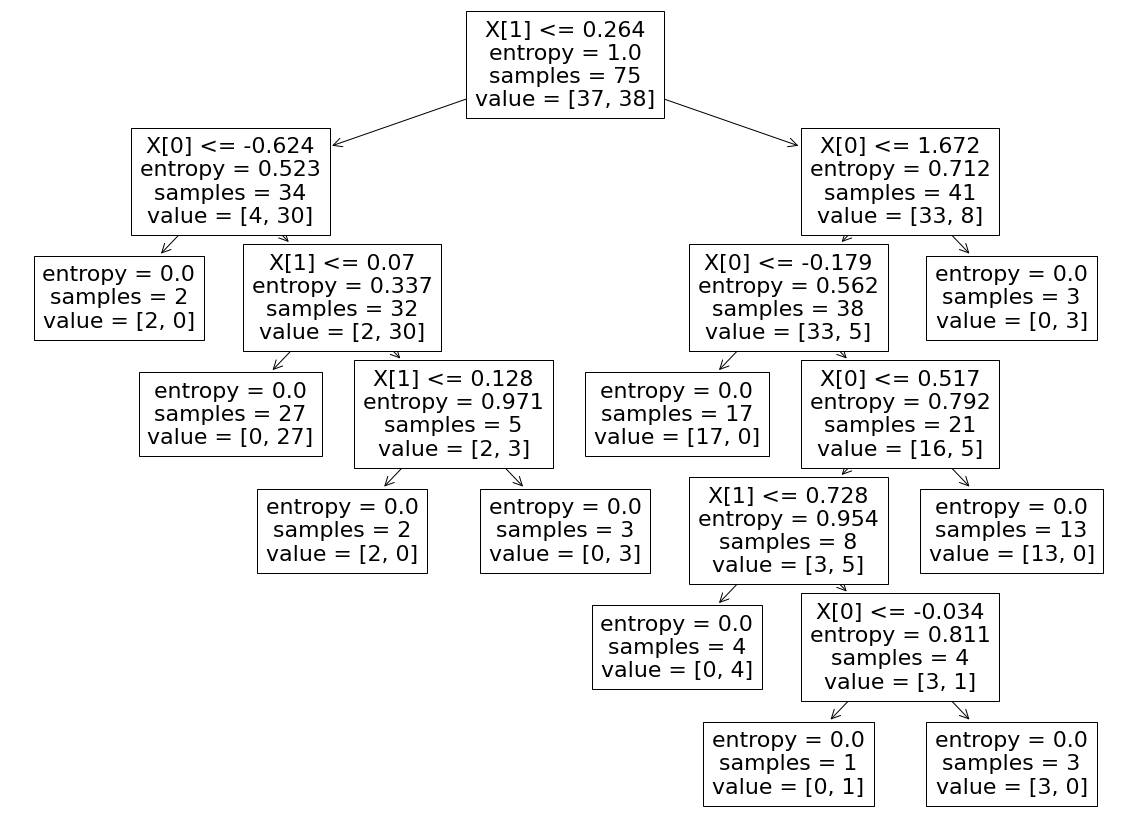

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
tree.plot_tree(model)
plt.show()
# 동전 던지기를 했는데 앞뒤면이 반반씩 나온다면 불확실성 최대, 한면만 계속 나온다면 순도 최대
# 엔트로피 : A 영역에 속한 모든 샘플이 동일한 범주에 속할 경우 (불확실성 최소, 순도 최대 ) => 엔트로피 0
# 반반씩 섞여 있을 경우 (불확실성 최대, 순도 최소) => 엔트로피 1
#gini index(지니 계수) : 0.0~0.5의 값, 작을수록 분류가 잘된 것(0이면 불확실성 최소, 순도 최대), 0.5이면 불확실성 최대, 순도 최소


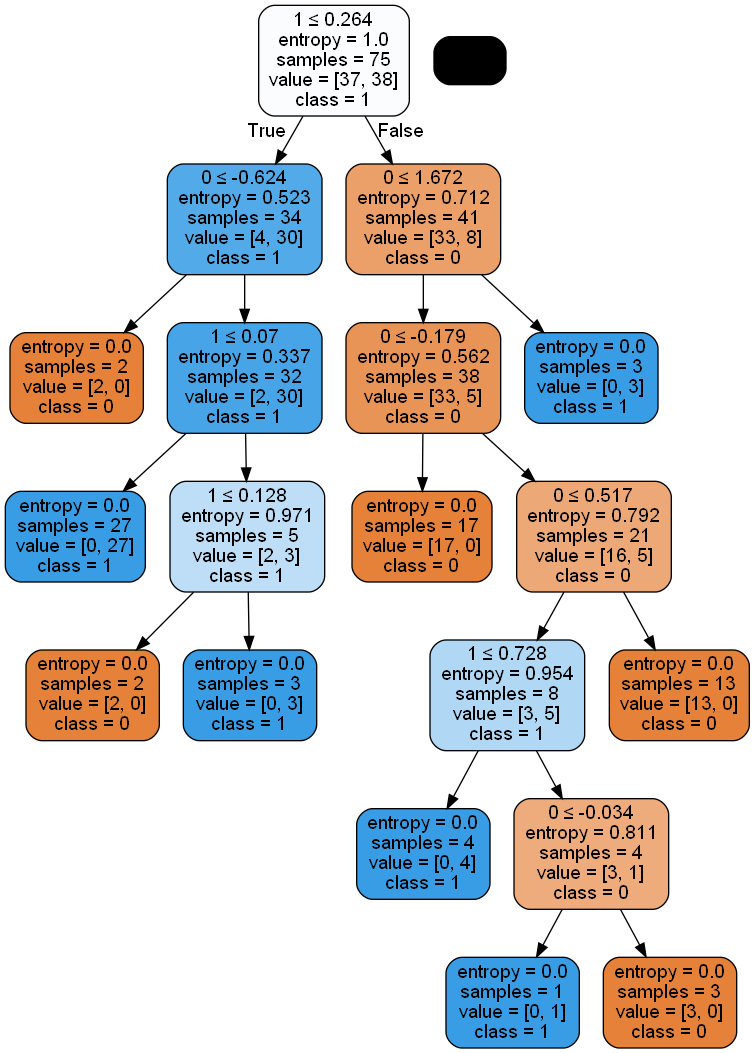

In [13]:
# graphviz exe 설치
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
import os
#os.environ["PATH"] += os.pathsep + 'C:/ProgramFiles/Graphviz/bin/'
dot_data = export_graphviz(model, out_file=None, feature_names=[0,1], class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

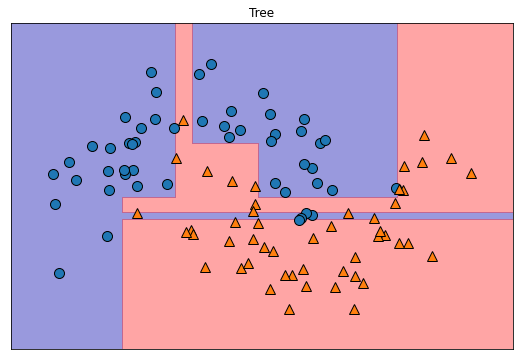

In [14]:
import mglearn
plt.figure(figsize=(9,6))
plt.title("Tree")
#클래스 구분면
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)
#산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [15]:
#동전 던지기
from math import log2, ceil
# 확률 50% 
p = 0.5
# 이벤트 정보 계산
h = -log2(p)
print('확률 :',p)
print('정보량 :',h,ceil(h)) # 1bit로 표현 가능

확률 : 0.5
정보량 : 1.0 1


In [16]:
# 10% 확률이 라면
p = 0.1
# 이벤트 정보 계산
h = -log2(p)
print('확률 :',p) 
print('정보량 :',h,ceil(h)) #4bit 가 필요함

확률 : 0.1
정보량 : 3.321928094887362 4


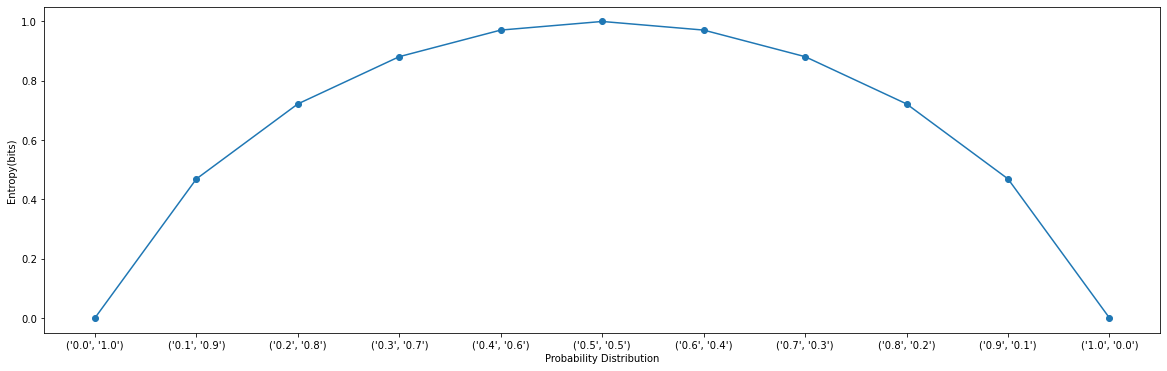

In [17]:
# 엔트로피는 0.0 ~ 1.0 사이의 값
# 1개 클래스만 구성되어 있으면 ( 100% 순도 ) 0, 2개 클래스가 같은 비율( 50:50 )로 섞여 있으면 1.0
from math import log2
import numpy as np
import matplotlib.pyplot as plt

def entropy(events):
# 1e-15 : 로그 계산에 오류가 발생하지 않도록 임의로 더해 주는 매우 작은 숫자값
    return -sum([p * log2(p + 1e-15) for p in events])
# 확률
probs = np.arange(0.0, 1.1, 0.1)
# 확률 분포
dists = [[p, 1 - p] for p in probs]
# 각 분포에 대한 엔트로피 계산
ents = [entropy(d) for d in dists]
# 학률분포와 엔트로피 그래프
plt.figure(figsize=(20,6))
plt.plot(probs, ents, marker='o')
xnum=[]
for d in dists:
    dd = (f'{d[0]:.1f}',f'{d[1]:.1f}')
    xnum.append(dd)
plt.xticks(probs, xnum)
plt.xlabel('Probability Distribution') #확률 분포
plt.ylabel('Entropy(bits)') #엔트로피
plt.show()

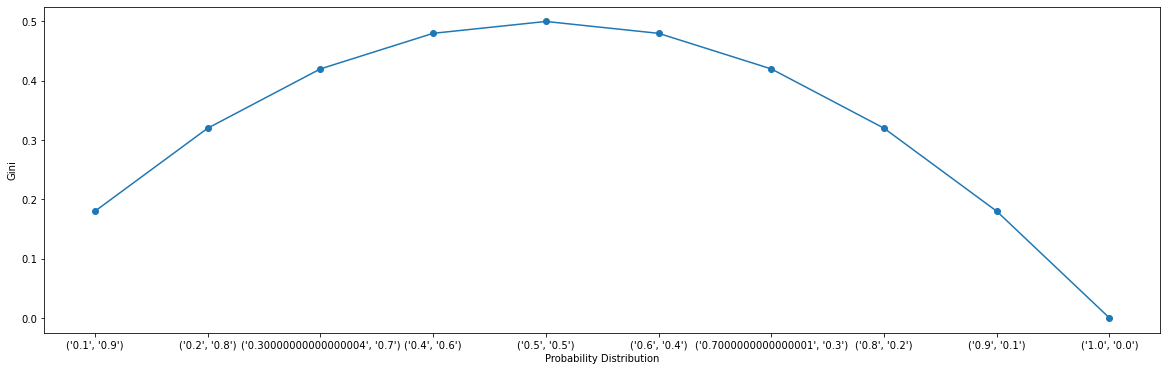

In [19]:
# 엔트로피는 0.0 ~ 1.0 사이의 값
# 1개 클래스만 구성되어 있으면 ( 100% 순도 ) 0, 2개 클래스가 같은 비율( 50:50 )로 섞여 있으면 1.0
from math import log2
from matplotlib import pyplot
def gini2(events):
    return sum([p * (1 - p) for p in events]) # 지니계수 계산 공식
# 확률
probs = np.arange(0.1, 1.1, 0.1)
# 확률 분포
dists = [[p, 1 - p] for p in probs]
# 각 분포에 대한 지니계수 계산
ents = [gini2(d) for d in dists]
# 학률분포와 지니계수 그래프
plt.figure(figsize=(20,6))
plt.plot(probs, ents, marker='o')
xnum=[]
for d in dists:
    dd = (str(d[0]),'{:.1f}'.format(d[1]))
    xnum.append(dd)
plt.xticks(probs, xnum)
plt.xlabel('Probability Distribution') # 확률 분포
plt.ylabel('Gini') # 지니계수
plt.show()

In [20]:
import pandas as pd
df=pd.read_csv('c:/data/rides/rides2.csv')
df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,1,0,114.648259,87,73,60,89,0
1,1,2,27.014097,87,78,76,87,1
2,0,1,63.300975,85,80,70,88,1
3,1,0,25.909931,88,72,66,89,0
4,0,4,54.718307,84,87,74,87,1


In [21]:
train_cols = df.columns[:-1]
X = df[train_cols]
y = df["overall"]

In [22]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['overall'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [23]:
df2["overall"].value_counts()

0    245
1    245
Name: overall, dtype: int64

In [24]:
X = X_samp[train_cols] # 독립변수
y = y_samp["overall"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [26]:
from sklearn.tree import DecisionTreeClassifier
# 노드분할전략 - 최선의 변수 선택 전략
# 트리 모형 생성 (기본옵션)
model1 = DecisionTreeClassifier(splitter='best', max_depth=3, random_state=0)
model1.fit(X_train, y_train)
print(" 학습용: ",model1.score(X_train, y_train))
print(" 검증용: ",model1.score(X_test, y_test)) 

 학습용:  0.8494897959183674
 검증용:  0.7857142857142857


In [27]:
# 노드분할전략 - 랜덤 분할 전략
model2 = DecisionTreeClassifier(splitter='random', max_depth=3, random_state=0)
model2.fit(X_train, y_train)
print(" 학습용: ",model2.score(X_train, y_train))
print(" 검증용: ",model2.score(X_test, y_test)) 

 학습용:  0.7270408163265306
 검증용:  0.7244897959183674


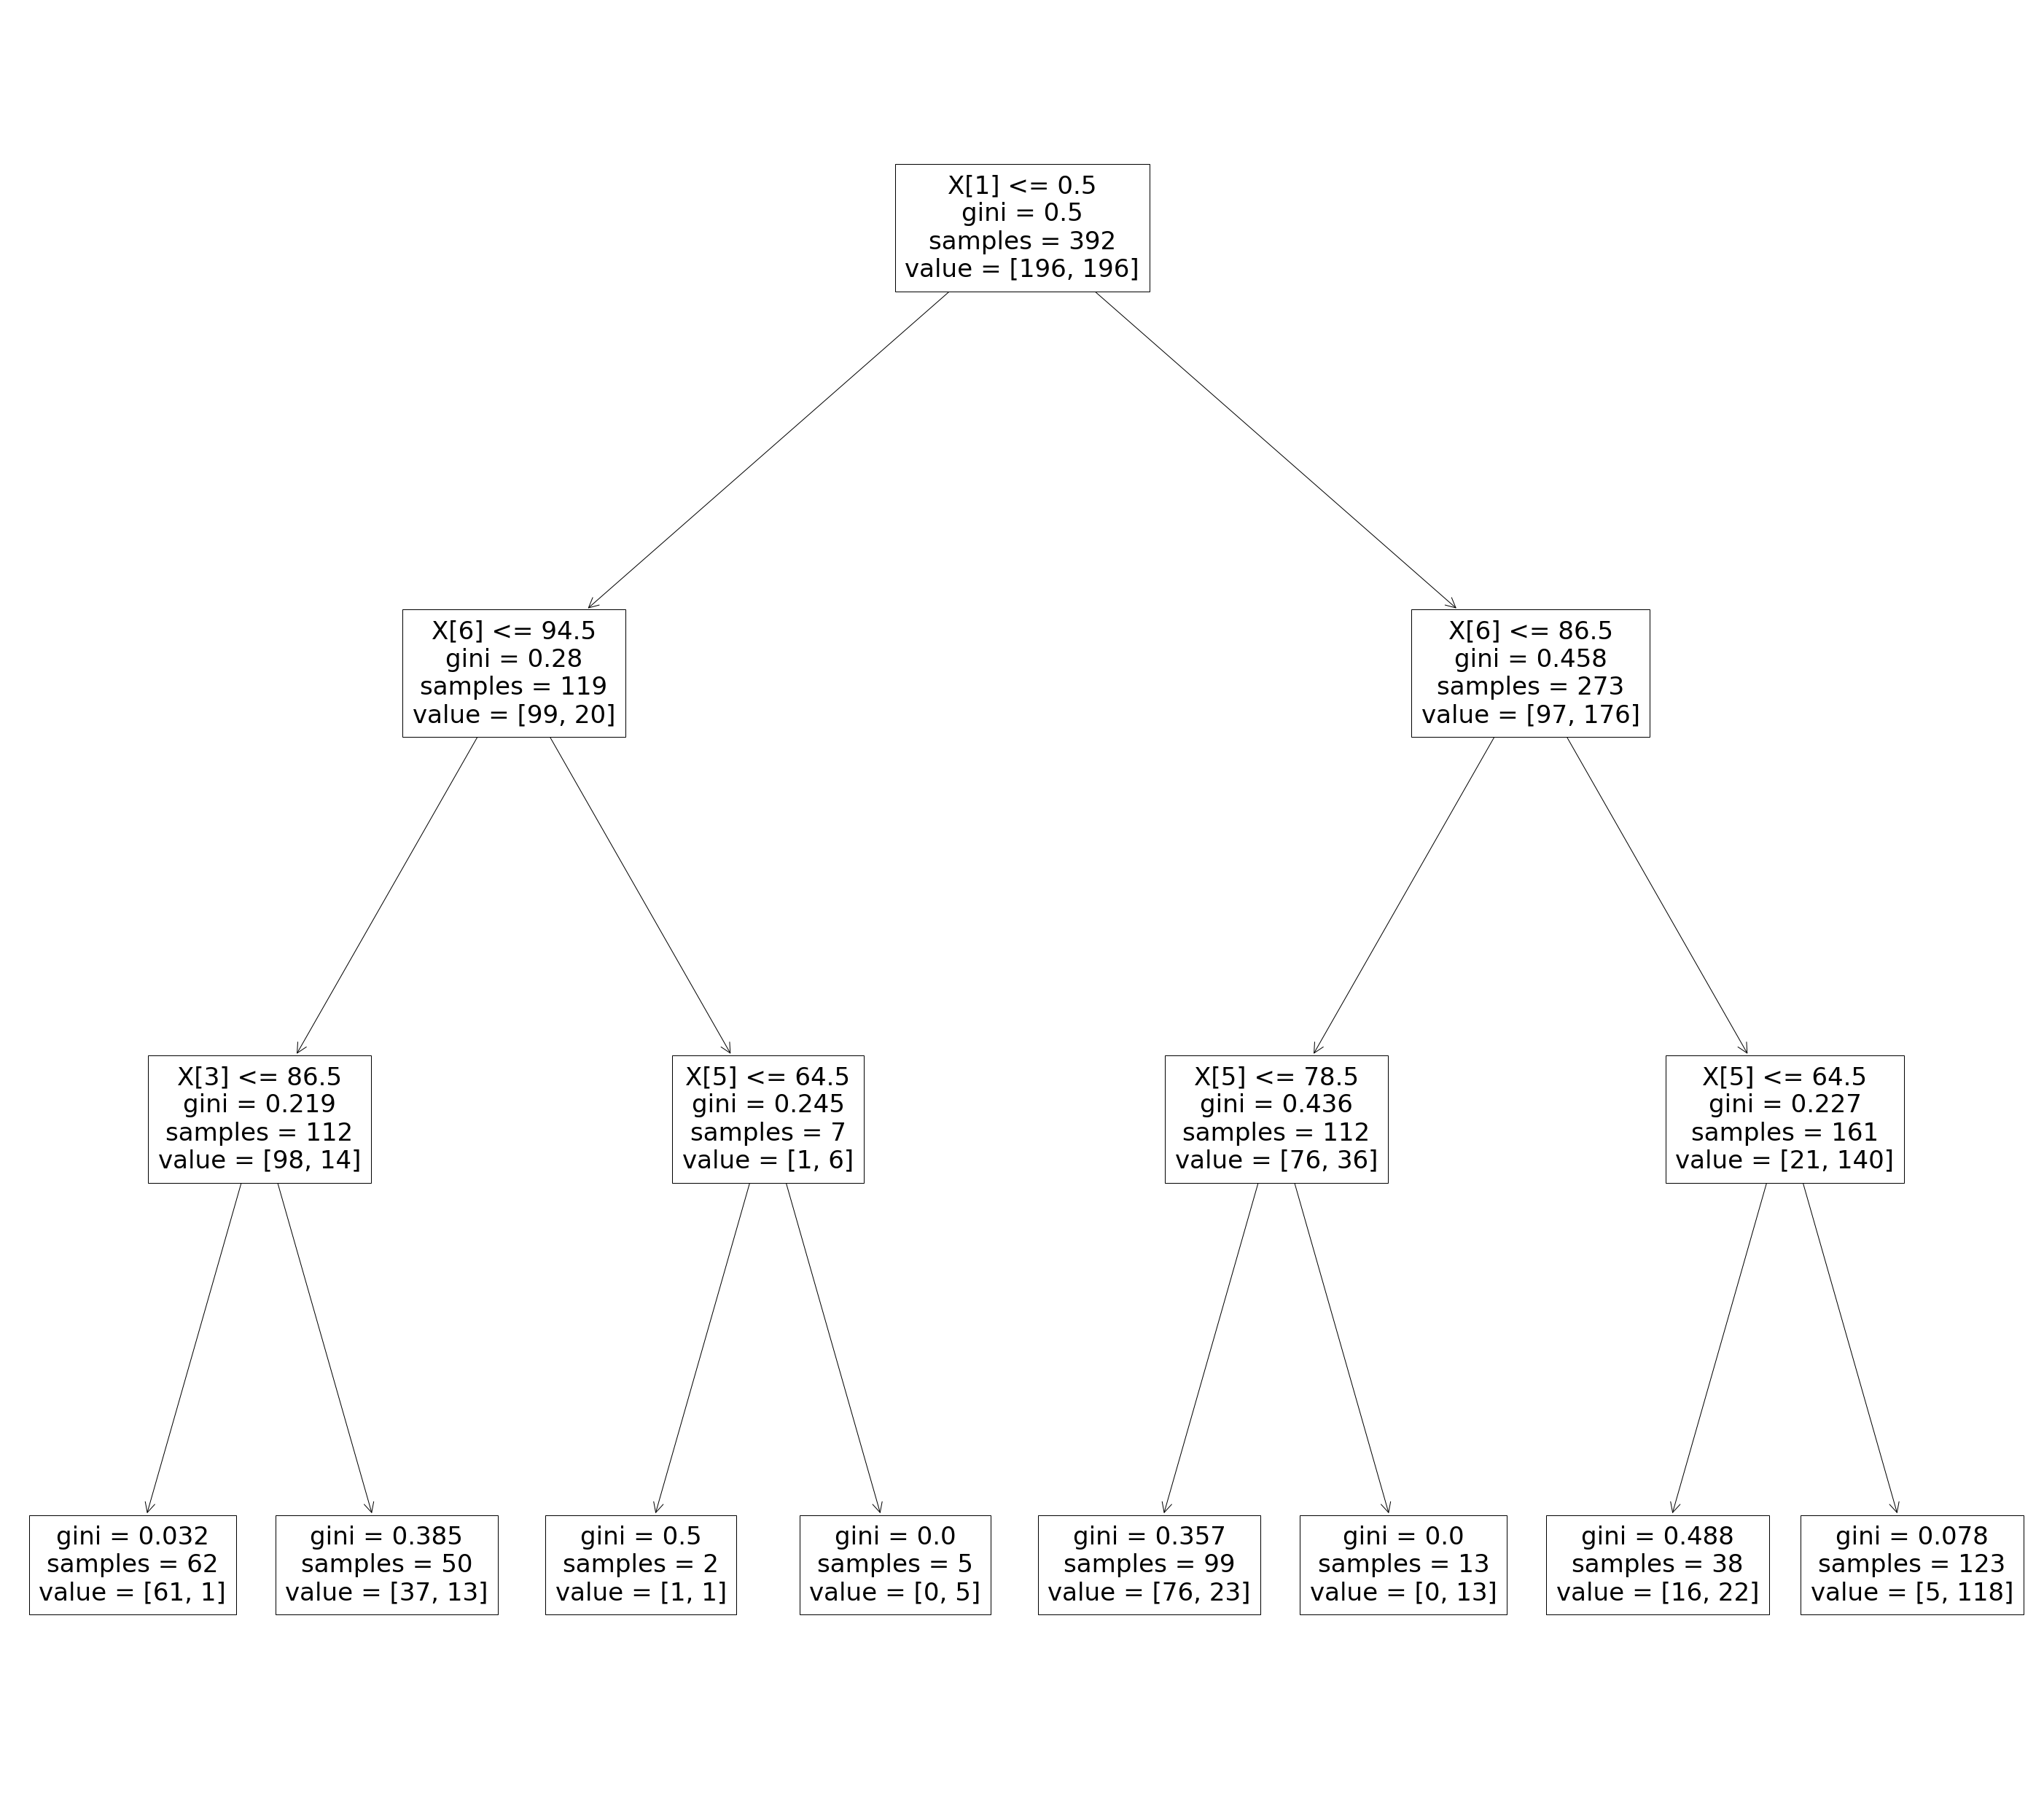

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,45))
tree.plot_tree(model1)
plt.show()

In [29]:
import pandas as pd
df = pd.read_csv("c:/data/customer/customer.csv")
df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [30]:
train_cols = df.columns[:-1]
X = df[train_cols]
y = df["Churn"]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
# 가지치기 경로 정보
path = clf.cost_complexity_pruning_path(X_train, y_train)
# print(path)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas) # 값이 크면 제거된 노드수가 증가 (가지치기 양을 조정하는 옵션)
print(impurities) # 노드의 불순도

[0.         0.00019908 0.00026042 0.00026445 0.00026491 0.00026538
 0.00031594 0.00037412 0.00038015 0.00038015 0.00038015 0.00038015
 0.00038197 0.00038197 0.00038768 0.00039094 0.00039295 0.00039309
 0.00039444 0.00039693 0.00039873 0.00039913 0.00040016 0.00040016
 0.00047358 0.00050914 0.00051515 0.00051849 0.00052346 0.00053355
 0.00053355 0.00053355 0.00060024 0.00060977 0.00060977 0.00066693
 0.00066693 0.00067847 0.0007114  0.00072029 0.00073343 0.0007503
 0.00075493 0.00076281 0.00076666 0.00076954 0.00077809 0.00078116
 0.0008161  0.00090036 0.00096038 0.00097442 0.00103476 0.00105485
 0.00131228 0.00169012 0.00186842 0.00205094 0.00216086 0.00219508
 0.00250862 0.00304989 0.00310298 0.00373953 0.00418187 0.00745216
 0.0078461  0.00952263 0.01230072 0.01620748 0.02223509 0.02556861]
[0.         0.00079632 0.00157758 0.00237094 0.00316567 0.0039618
 0.00554151 0.00628975 0.00705005 0.00857066 0.00933097 0.01009127
 0.01085521 0.01161915 0.01239452 0.01317639 0.01474819 0.01632

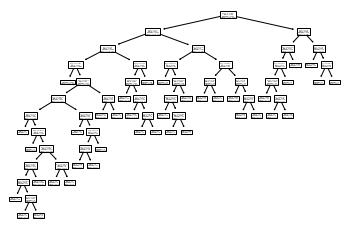

In [36]:
import matplotlib.pyplot as plt
from sklearn import tree
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0008)
clf.fit(X_train, y_train)
plt.Figure(figsize=(20,15))
tree.plot_tree(clf)
plt.show()

Text(0, 0.5, 'impurities')

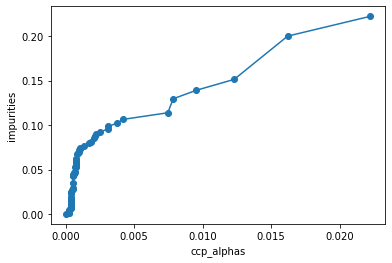

In [37]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o')
plt.xlabel("ccp_alphas")
plt.ylabel("impurities")
# ccp_alpha가 증가하면 가지치기된 노드수 증가 => 불순도가 증가함
# ccp_alpha가 감소하면 가지치기된 노드수 감소 => 불순도가 감소함

In [39]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

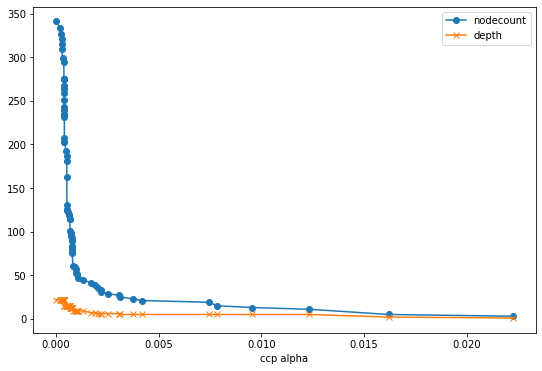

In [40]:
# 마지막 값은 전체 트리를 가지치기하여 하나의 노드로 트리를 남기는 알파값이므로 제외하고 출력
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(9,6))
plt.plot(ccp_alphas, node_counts, marker='o', label='nodecount')
plt.plot(ccp_alphas, depth, marker='x', label='depth')
plt.xlabel("ccp alpha")
plt.legend()
plt.show()
#ccp alpha가 증가하면 노드 갯수가 감소한다. (가지치기를 많이 하는 옵션)

 최고 정확도 : 0.9616306954436451
 최적의 alpha: 0.0008161045299304866


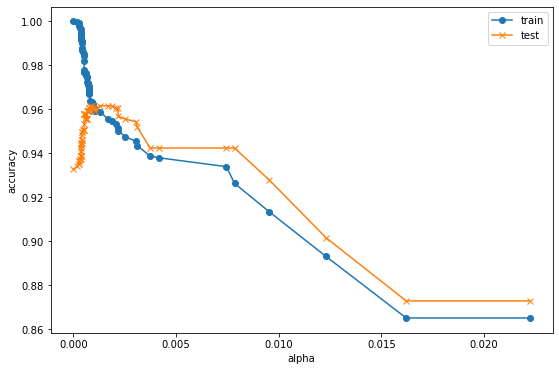

In [41]:
import numpy as np
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
m=max(test_scores)
i=np.argmax(test_scores)
print(' 최고 정확도 :',m) 
print(' 최적의 alpha:',ccp_alphas[i])
plt.figure(figsize=(9,6))
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.plot(ccp_alphas, train_scores, marker='o',
label="train")
plt.plot(ccp_alphas, test_scores, marker='x', label="test")
plt.legend()
# ccp_alpha가 0이면 과적합 문제 발생
# 알파가 증가하면 가지치기가 진행되어 일반적인 트리가 됨

In [43]:
import pandas as pd
df = pd.read_csv("c:/data/pima/data.csv")
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
X=df[df.columns[:-1]]
y=df['outcome']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=0)

In [46]:

from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

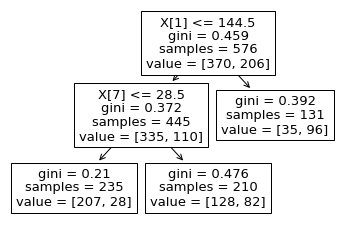

In [50]:
import matplotlib.pyplot as plt
from sklearn import tree
#plt.figure(figsize=(9,6))
tree.plot_tree(model1)
plt.show()
# value=[207,28] 0,1 샘플 갯수

In [51]:
from sklearn.tree import export_text
# 의사결정나무 모형에서 도출한 규칙들을 텍스트로 출력
tree_rules = export_text(model1,feature_names=list(X_train.columns))
print(tree_rules)

|--- glucose <= 144.50
|   |--- age <= 28.50
|   |   |--- class: 0
|   |--- age >  28.50
|   |   |--- class: 0
|--- glucose >  144.50
|   |--- class: 1



In [52]:
# tree_ : 트리의 루트 노드
n_nodes = model1.tree_.node_count
print(' 노드 갯수:',n_nodes) 
threshold = model1.tree_.threshold
print(' 노드의 임계값:',threshold)

 노드 갯수: 5
 노드의 임계값: [144.5  28.5  -2.   -2.   -2. ]


In [53]:
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

0.7482638888888888
0.75


In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=16, n_features=2,
n_informative=2, n_redundant=0,
random_state=10)

In [2]:
                                # 로지스틱회귀분석
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)


In [3]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T,
columns=["f", "y_hat", "y"])
#f값을 내림차순으로 정렬
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.471816,1.0,1.0
1,2.100107,1.0,1.0
2,1.465129,1.0,1.0
3,1.293446,1.0,1.0
4,1.285234,1.0,0.0
5,0.908117,1.0,1.0
6,0.901632,1.0,1.0
7,0.164087,1.0,1.0
8,-0.647279,0.0,0.0
9,-0.735501,0.0,0.0


In [4]:
#0을 기준으로 계산한 결과
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_hat, labels=[0,1])
# 윗줄FPR, 아래줄TPR

array([[7, 1],
       [1, 7]], dtype=int64)

In [5]:
# 0을 기준으로 계산한 결과
tpr0 = 7 / (7 + 1)
fpr0 = 1 / (1 + 7)
print(tpr0)
print(fpr0)

0.875
0.125


In [6]:
# 판별함수의 출력값에 따라 판별기준을 바꾸어 계산한 fpr,tpr
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, model.decision_function
(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.4718164 ,  2.4718164 ,  1.29344604,  1.28523411,  0.16408684,
        -0.9956665 , -1.03203074, -2.9451636 ]))